In [ ]:
# Temel kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir_path = "/content/drive/My Drive/Machine Learning/obesity_risk_prediction/ObesityDataSet_raw_and_data_sinthetic.csv"

In [ ]:
df = pd.read_csv(dir_path)

# Veri Analizi

In [ ]:
df.shape

(2111, 17)

In [ ]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

1. **Gender**: Cinsiyet. (0 = Erkek, 1 = Kadın)
2. **Age**: Yaş. Bireyin yaşını belirtir.
3. **Height**: Boy. Bireyin metre cinsinden boy uzunluğu.
4. **Weight**: Ağırlık. Bireyin kilogram cinsinden vücut ağırlığı.
5. **family_history_with_overweight**: Ailede fazla kilo geçmişi. (1 = Evet, 0 = Hayır)
6. **FAVC**: Yüksek kalorili yiyecekleri sık tüketme durumu. (1 = Evet, 0 = Hayır)
7. **FCVC**: Sebze tüketim sıklığı. Bireyin günlük sebze tüketme alışkanlığı. (0 = Hiç, 1 = Az, 2 = Orta, 3 = Çok)
8. **NCP**: Günlük ana öğün sayısı. (1 = 1 öğün, 2 = 2 öğün, 3 = 3 öğün)
9. **CAEC**: Ara öğün tüketim sıklığı. (0 = Hiç, 1 = Bazen, 2 = Sık sık, 3 = Her zaman)
10. **SMOKE**: Sigara içme durumu. (1 = Evet, 0 = Hayır)
11. **CH2O**: Günlük su tüketim miktarı. (1 = Az, 2 = Orta, 3 = Çok)
12. **SCC**: Kalori alımını takip etme durumu. (1 = Evet, 0 = Hayır)
13. **FAF**: Haftalık fiziksel aktivite sıklığı. (0 = Hiç, 1 = Az, 2 = Orta, 3 = Sık)
14. **TUE**: Günlük teknolojik cihaz kullanım süresi (saat). (1 = Az, 2 = Orta, 3 = Çok)
15. **CALC**: Alkol tüketim sıklığı. (0 = Hiç, 1 = Az, 2 = Orta, 3 = Sık)
16. **MTRANS**: Ulaşım şekli. (0 = Yürüyerek, 1 = Bisiklet, 2 = Kamu Taşımacılığı, 3 = Araç)
17. **NObeyesdad**: Obezite durumu. Bireyin vücut kitle indeksine (BMI) göre sınıflandırıldığı obezite durumu. (0 = Zayıf, 1 = Normal, 2 = Fazla Kilolu, 3 = Obez, 4 = Aşırı Obez)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [ ]:
# Kategorik sütunları LabelEncoder ile sayısal hale getirme
labelencoder = LabelEncoder()

categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC',
                    'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for col in categorical_cols:
  df[col] = labelencoder.fit_transform(df[col])

In [ ]:
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6
5,1,29.0,1.62,53.0,0,1,2.0,3.0,2,0,2.0,0,0.0,0.0,2,0,1
6,0,23.0,1.50,55.0,1,1,3.0,3.0,2,0,2.0,0,1.0,0.0,2,2,1
7,1,22.0,1.64,53.0,0,0,2.0,3.0,2,0,2.0,0,3.0,0.0,2,3,1
8,1,24.0,1.78,64.0,1,1,3.0,3.0,2,0,2.0,0,1.0,1.0,1,3,1
9,1,22.0,1.72,68.0,1,1,2.0,3.0,2,0,2.0,0,1.0,1.0,3,3,1


# Veri Görselleştirme

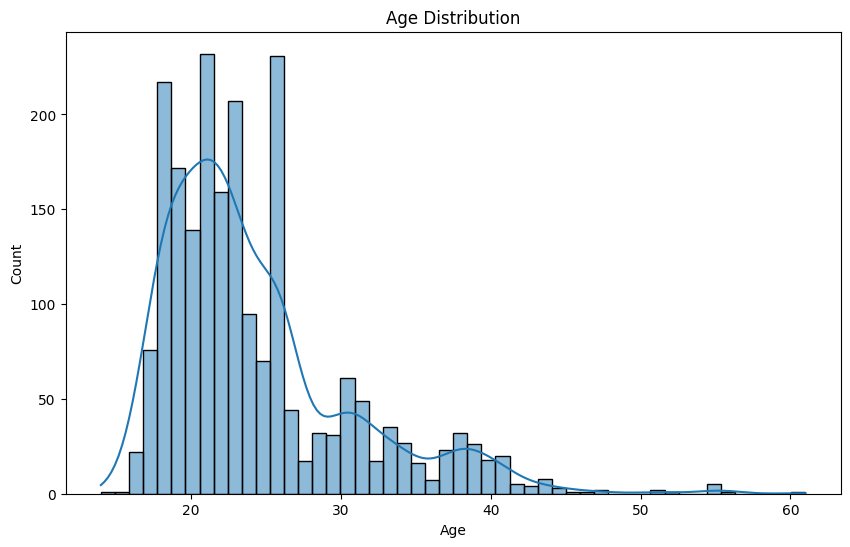

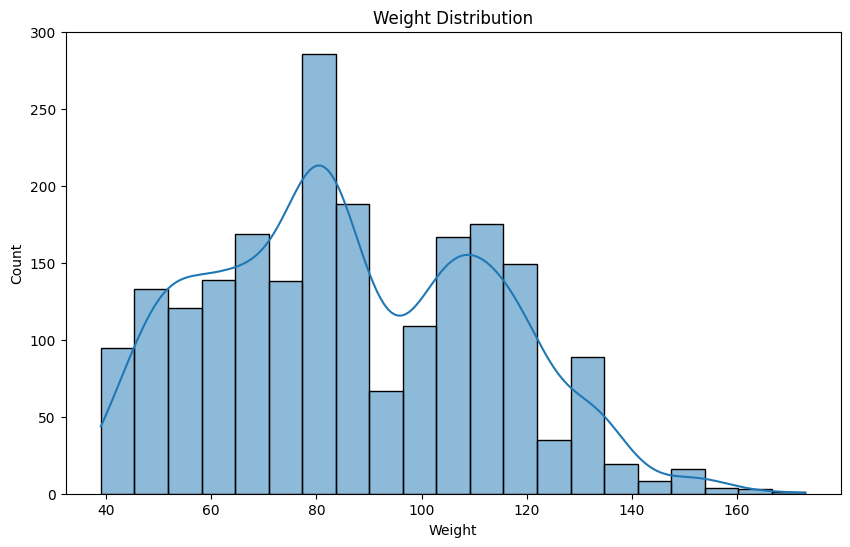

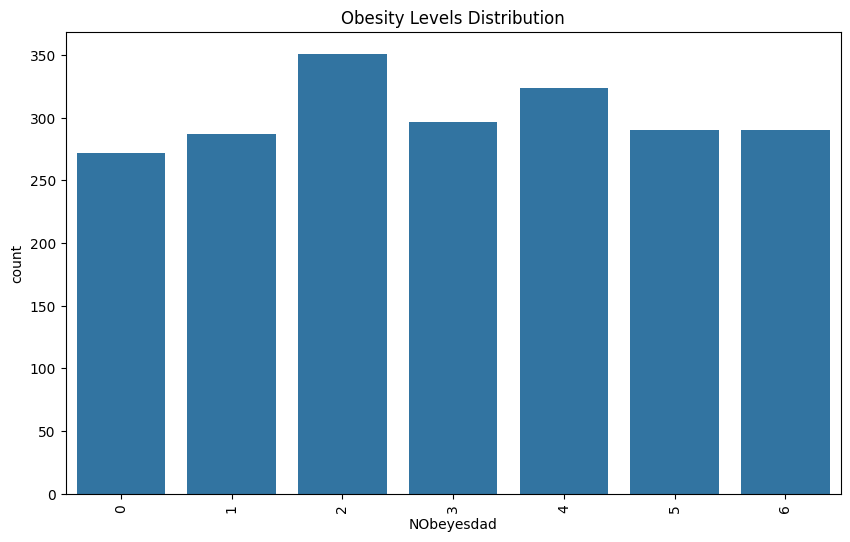

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['Weight'], kde=True)
plt.title('Weight Distribution')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='NObeyesdad', data=df)
plt.title('Obesity Levels Distribution')
plt.xticks(rotation=90)
plt.show()


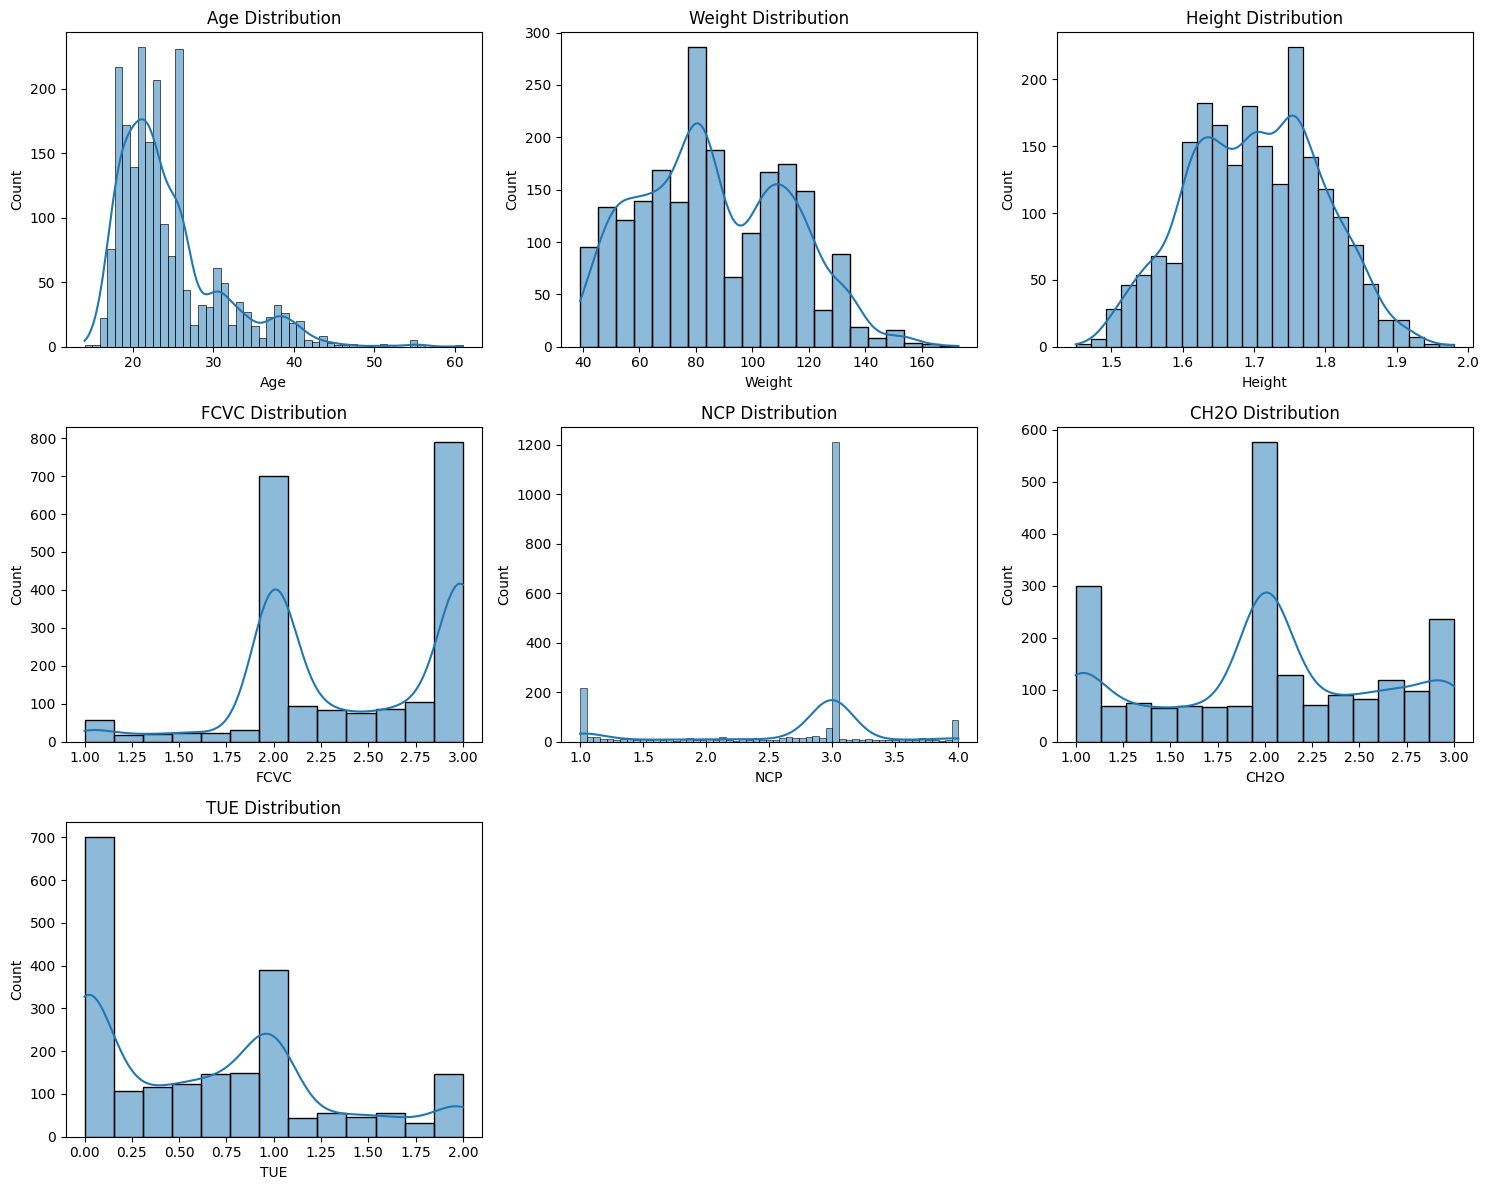

In [ ]:
# Sürekli değişkenlerin listesi
continuous_cols = ['Age', 'Weight', 'Height', 'FCVC', 'NCP', 'CH2O', 'TUE']

plt.figure(figsize=(15, 12))

for i, col in enumerate(continuous_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

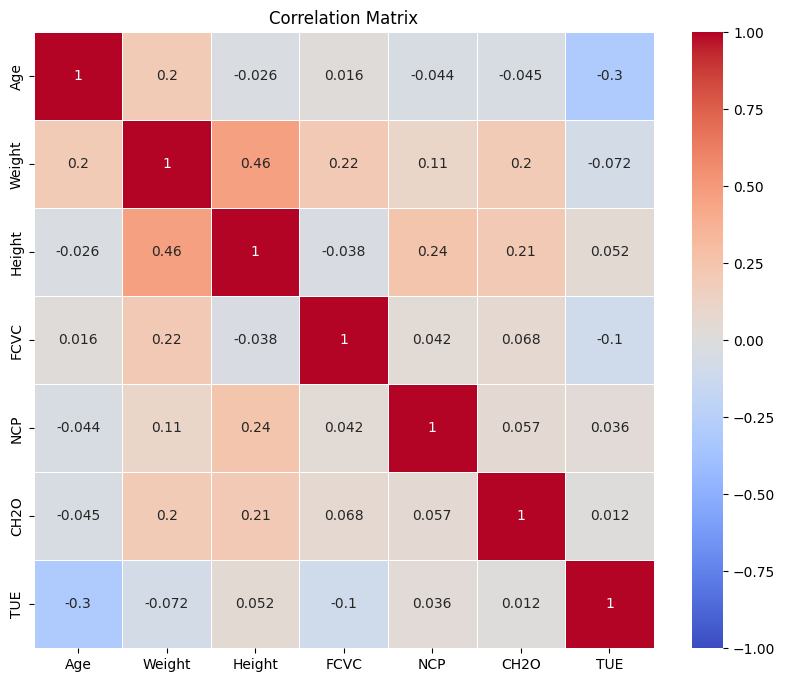

In [ ]:
# Sürekli değişkenler arasındaki korelasyonu hesaplayalım
corr_matrix = df[continuous_cols].corr()

# Korelasyon matrisi görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Model Hazırlık - Oluşturma ve Değerlendirme

In [ ]:
# Hedef değişkeni (NObeyesdad) ve bağımsız değişkenleri ayıralım
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Veriyi standardize edelim
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Modeli eğit
    model.fit(X_train, y_train)

    # Test seti üzerinde tahmin yap
    y_pred = model.predict(X_test)

    # Performans metriklerini hesapla
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Modelin sonuçlarını yazdır
    print(f"Model: {str(model)}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("\n")
    return accuracy, precision, recall, f1


In [ ]:
# Kullanacağımız modeller
models = [
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    SVC(random_state=42),
    LogisticRegression(max_iter=1000, random_state=42),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=42),
    GaussianNB(),
    ExtraTreesClassifier(random_state=42),
    MLPClassifier(random_state=42, max_iter=1000)
]

# Performans sonuçlarını saklayalım
performance_results = []

# Her bir modeli değerlendirelim
for model in models:
    performance = evaluate_model(model, X_train, X_test, y_train, y_test)
    performance_results.append((f"{model}", performance))

Model: RandomForestClassifier(random_state=42)
Accuracy: 0.943217665615142
Precision: 0.945160254570022
Recall: 0.943217665615142
F1 Score: 0.9436939991173161


Model: GradientBoostingClassifier(random_state=42)
Accuracy: 0.9479495268138801
Precision: 0.9491778777399106
Recall: 0.9479495268138801
F1 Score: 0.9478273239260451




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: AdaBoostClassifier(random_state=42)
Accuracy: 0.3659305993690852
Precision: 0.530309702314155
Recall: 0.3659305993690852
F1 Score: 0.25954755977908106


Model: SVC(random_state=42)
Accuracy: 0.8722397476340694
Precision: 0.8765265222982701
Recall: 0.8722397476340694
F1 Score: 0.8725050650544228


Model: LogisticRegression(max_iter=1000, random_state=42)
Accuracy: 0.8580441640378549
Precision: 0.8612730086211067
Recall: 0.8580441640378549
F1 Score: 0.85428119396124


Model: KNeighborsClassifier()
Accuracy: 0.804416403785489
Precision: 0.8022517188269486
Recall: 0.804416403785489
F1 Score: 0.7958209693388201


Model: DecisionTreeClassifier(random_state=42)
Accuracy: 0.9148264984227129
Precision: 0.9147448968493831
Recall: 0.9148264984227129
F1 Score: 0.9144991172712683


Model: GaussianNB()
Accuracy: 0.6056782334384858
Precision: 0.6148344448903227
Recall: 0.6056782334384858
F1 Score: 0.5867424942472462


Model: ExtraTreesClassifier(random_state=42)
Accuracy: 0.9353312302839116
Pr